# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
#%pip install --upgrade plotly

## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print(f"Household income dataframe shape:  {df_hh_income.shape[0]} rows and {df_hh_income.shape[1]} columns")
print(f"Household income dataframe column names:  {df_hh_income.columns}")
print(f"Household income dataframe - NaN values?  {df_hh_income.isna().values.any()}")
print(f"Household income dataframe - Duplicates?  {df_hh_income.duplicated().values.any()}")

Household income dataframe shape:  29322 rows and 3 columns
Household income dataframe column names:  Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Household income dataframe - NaN values?  True
Household income dataframe - Duplicates?  False


In [ ]:
print(f"Percentage of people below poverty line dataframe shape:  {df_pct_poverty.shape[0]} rows and {df_pct_poverty.shape[1]} columns")
print(f"Percentage of people below poverty line dataframe column names:  {df_pct_poverty.columns}")
print(f"Percentage of people below poverty line dataframe - NaN values?  {df_pct_poverty.isna().values.any()}")
print(f"Percentage of people below poverty line dataframe - Duplicates?  {df_pct_poverty.duplicated().values.any()}")

Percentage of people below poverty line dataframe shape:  29329 rows and 3 columns
Percentage of people below poverty line dataframe column names:  Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Percentage of people below poverty line dataframe - NaN values?  False
Percentage of people below poverty line dataframe - Duplicates?  False


In [ ]:
print(f"Percentage over 25 completed high school dataframe shape: {df_pct_completed_hs.shape[0]} rows and {df_pct_completed_hs.shape[1]} columns")
print(f"Percentage of people below poverty line dataframe column names:  {df_pct_completed_hs.columns}")
print(f"Percentage of people below poverty line dataframe - NaN values?  {df_pct_completed_hs.isna().values.any()}")
print(f"Percentage of people below poverty line dataframe - Duplicates?  {df_pct_completed_hs.duplicated().values.any()}")

Percentage over 25 completed high school dataframe shape: 29329 rows and 3 columns
Percentage of people below poverty line dataframe column names:  Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Percentage of people below poverty line dataframe - NaN values?  False
Percentage of people below poverty line dataframe - Duplicates?  False


In [ ]:
print(f"Share of race by city dataframe shape:  {df_share_race_city.shape[0]} rows and {df_share_race_city.shape[1]} columns")
print(f"Share of race by city dataframe column names:  {df_share_race_city.columns}")
print(f"Share of race by city dataframe - NaN values?  {df_share_race_city.isna().values.any()}")
print(f"Share of race by city dataframe - Duplicates?  {df_share_race_city.duplicated().values.any()}")

Share of race by city dataframe shape:  29268 rows and 7 columns
Share of race by city dataframe column names:  Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Share of race by city dataframe - NaN values?  False
Share of race by city dataframe - Duplicates?  False


In [ ]:
print(f"Deaths by police dataframe shape:  {df_fatalities.shape[0]} rows and {df_fatalities.shape[1]} columns")
print(f"Deaths by police dataframe column names:  {df_fatalities.columns}")
print(f"Deaths by police dataframe - NaN values?  {df_fatalities.isna().values.any()}")
print(f"Deaths by police dataframe - Duplicates?  {df_fatalities.duplicated().values.any()}")

Deaths by police dataframe shape:  2535 rows and 14 columns
Deaths by police dataframe column names:  Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')
Deaths by police dataframe - NaN values?  True
Deaths by police dataframe - Duplicates?  False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [ ]:
# DFs with NaN values: Household income and Deaths by police
df_hh_income[df_hh_income.isna().values]

,Geographic Area,City,Median Income
29119,WY,Albany CDP,NaN
29121,WY,Alcova CDP,NaN
29123,WY,Alpine Northeast CDP,NaN
29126,WY,Antelope Hills CDP,NaN
29129,WY,Arlington CDP,NaN
29130,WY,Arrowhead Springs CDP,NaN
29132,WY,Atlantic City CDP,NaN
29133,WY,Auburn CDP,NaN
29139,WY,Bedford CDP,NaN
29140,WY,Bessemer Bend CDP,NaN


In [ ]:
# Household income data is missing for WY. Drop these rows from the df.
print(df_hh_income.shape)
df_hh_income.dropna(inplace=True)
print(df_hh_income.shape)

(29322, 3)
(29271, 3)


In [ ]:
df_fatalities[df_fatalities.isna().values]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
59,110,William Campbell,25/01/15,shot,gun,59.00,M,NaN,Winslow,NJ,False,attack,Not fleeing,False
124,584,Alejandro Salazar,20/02/15,shot,gun,NaN,M,H,Houston,TX,False,attack,Car,False
241,244,John Marcell Allen,30/03/15,shot,gun,54.00,M,NaN,Boulder City,NV,False,attack,Not fleeing,False
266,534,Mark Smith,09/04/15,shot and Tasered,vehicle,54.00,M,NaN,Kellyville,OK,False,attack,Other,False
340,433,Joseph Roy,07/05/15,shot,knife,72.00,M,NaN,Lawrenceville,GA,True,other,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,2819,Brian J. Skinner,28/07/17,shot,knife,32.00,M,NaN,Glenville,NY,True,other,Not fleeing,False
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False


In [ ]:
# Populate unknown values in this dataset with "unknown" or "undetermined"
df_fatalities["race"] = df_fatalities["race"].fillna("unknown")
df_fatalities["age"] = df_fatalities["age"].fillna("unknown")
df_fatalities["armed"] = df_fatalities["armed"].fillna("undetermined")
df_fatalities["flee"] = df_fatalities["flee"].fillna("undetermined")

df_fatalities.sample()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
829,975,James Covington,02/11/15,shot,gun,62.00,M,B,Washington,DC,False,attack,Car,False


In [ ]:
# Drop rows where the value for poverty rate is '-'
print(df_pct_poverty.shape)
df_pct_poverty.drop(df_pct_poverty.index[df_pct_poverty.poverty_rate.str.contains('-')], inplace=True)
print(df_pct_poverty.shape)

(29329, 3)
(29128, 3)


In [ ]:
# Drop rows where the value for % completed high school is '-'
print(df_pct_completed_hs.shape)
df_pct_completed_hs.drop(df_pct_completed_hs.index[df_pct_completed_hs.percent_completed_hs.str.contains('-')], inplace=True)
print(df_pct_completed_hs.shape)

(29329, 3)
(29132, 3)


In [ ]:
# Drop rows where the value for the share of a race is (X)
print(df_share_race_city.shape)
df_share_race_city.drop(df_share_race_city.index[df_share_race_city.share_white.str.contains('X')], inplace=True)
print(df_share_race_city.shape)

(29268, 7)
(29248, 7)


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
df_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [ ]:
# Convert poverty rate column from object to float
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate)
df_pct_poverty.poverty_rate.dtypes

dtype('float64')

In [ ]:
poverty_by_state = df_pct_poverty.groupby('Geographic Area',
                                          as_index=False).agg({'poverty_rate': pd.Series.mean})
poverty_by_state.sort_values('poverty_rate', ascending=False, inplace=True)
poverty_by_state

,Geographic Area,poverty_rate
25,MS,26.88
3,AZ,25.67
10,GA,23.78
32,NM,23.08
2,AR,22.96
18,LA,22.34
40,SC,22.16
49,WV,21.13
36,OK,20.66
1,AL,20.65


In [ ]:
poverty_rate_chart = px.bar(poverty_by_state,
                            x="poverty_rate",
                            y="Geographic Area",
                            color="poverty_rate",
                            color_continuous_scale='OrRd',
                            title="Poverty Rate by US State")
poverty_rate_chart.update_layout(xaxis_title='Poverty Rate (%)',
                                 yaxis_title='State',
                                 coloraxis_showscale=False,
                                 yaxis=dict(autorange="reversed"),
                                 autosize=False,
                                 width=1200,
                                 height=1000)
poverty_rate_chart.show()

In [ ]:
highest_pov = poverty_by_state[poverty_by_state.poverty_rate == poverty_by_state.poverty_rate.max()].iloc[0]["Geographic Area"]

lowest_pov = poverty_by_state[poverty_by_state.poverty_rate == poverty_by_state.poverty_rate.min()].iloc[0]["Geographic Area"]

In [ ]:
print(f"State with highest poverty rate:  {highest_pov}")
print(f"State with lowest poverty rate:  {lowest_pov}")

State with highest poverty rate:  MS
State with lowest poverty rate:  NJ


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [ ]:
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [ ]:
# Convert high school completed % from object to float
df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs)
df_pct_completed_hs.percent_completed_hs.dtypes

dtype('float64')

In [ ]:
completed_hs_by_state = df_pct_completed_hs.groupby('Geographic Area', 
                                                    as_index=False).agg({'percent_completed_hs': pd.Series.mean})
completed_hs_by_state.sort_values('percent_completed_hs', inplace=True)
completed_hs_by_state

,Geographic Area,percent_completed_hs
43,TX,75.69
25,MS,78.47
10,GA,79.01
18,LA,79.29
2,AR,79.95
1,AL,80.30
3,AZ,80.47
40,SC,80.85
32,NM,80.98
42,TN,81.63


In [ ]:
completed_hs_chart = px.bar(completed_hs_by_state,
                            x="percent_completed_hs",
                            y="Geographic Area",
                            color="percent_completed_hs",
                            color_continuous_scale='RdBu',
                            title="High School Graduation Rate by US State")
completed_hs_chart.update_layout(xaxis_title='High School Graduation Rate (%)',
                                 yaxis_title='State',
                                 coloraxis_showscale=False,
                                 yaxis=dict(autorange="reversed"),
                                 autosize=False,
                                 width=1200,
                                 height=1000)
completed_hs_chart.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

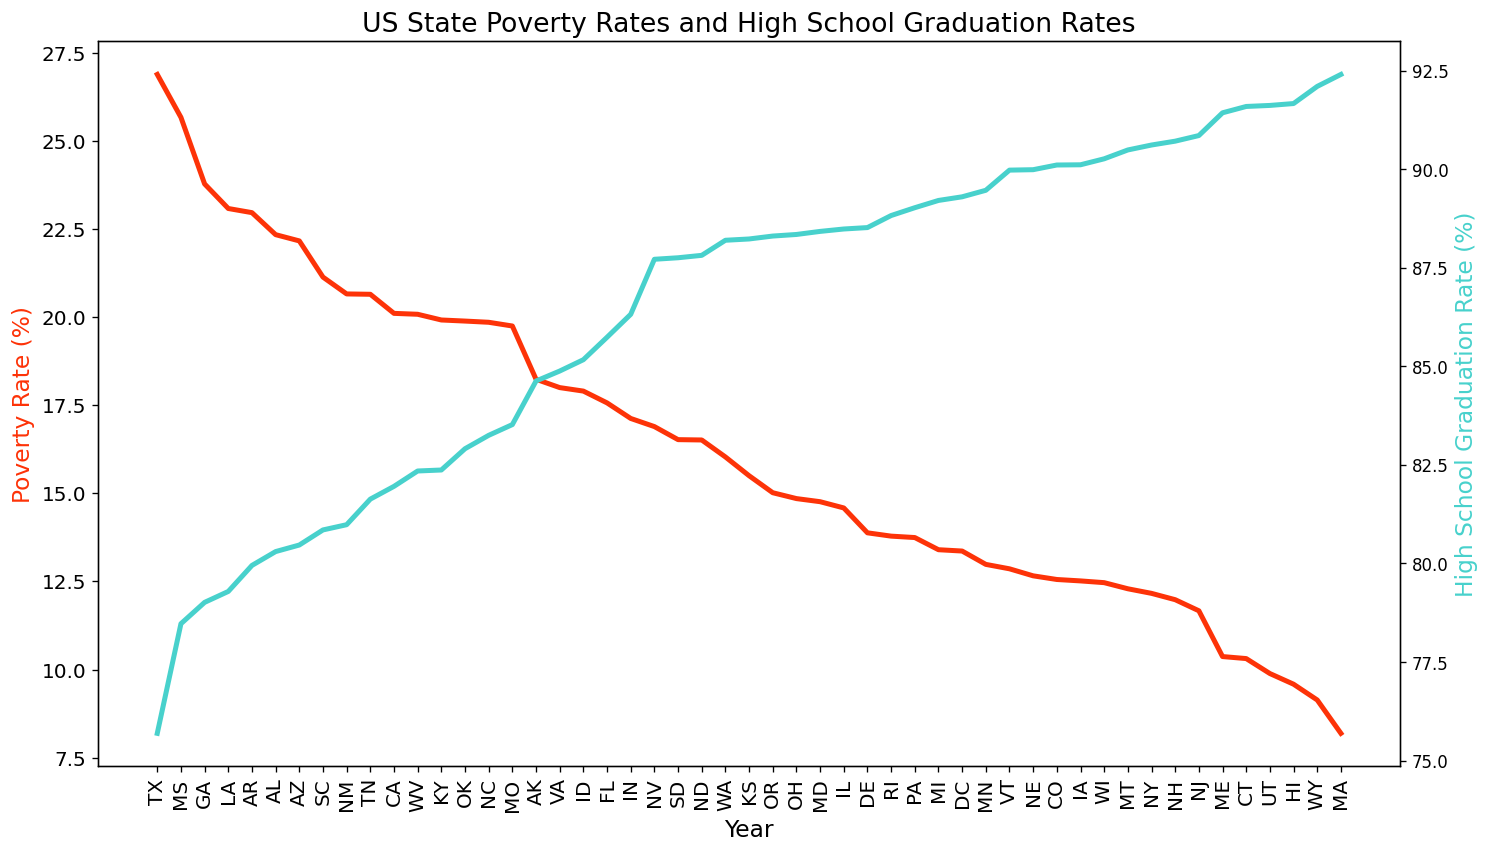

In [ ]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('US State Poverty Rates and High School Graduation Rates', fontsize=16)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

ax1 = plt.gca()
ax2 = plt.twinx()

ax1.plot(poverty_by_state["Geographic Area"], poverty_by_state.poverty_rate, color='#FD3308', linewidth=3)
ax2.plot(completed_hs_by_state["Geographic Area"], completed_hs_by_state.percent_completed_hs, color='mediumturquoise', linewidth=3)

ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Poverty Rate (%)', fontsize=14, color='#FD3308')
ax2.set_ylabel('High School Graduation Rate (%)', fontsize=14, color='mediumturquoise')

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

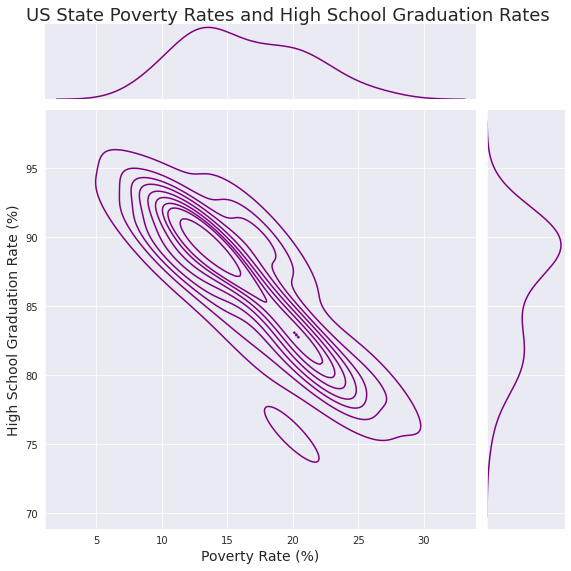

In [ ]:
with sns.axes_style('darkgrid'):
  jointplot = sns.jointplot(x=poverty_by_state.poverty_rate,
                            y=completed_hs_by_state.percent_completed_hs,
                            height=8,
                            kind='kde',
                            color='purple')
  jointplot.fig.suptitle("US State Poverty Rates and High School Graduation Rates", fontsize=18)
  jointplot.fig.tight_layout()
  jointplot.fig.subplots_adjust(top=0.95)
  jointplot.ax_joint.set_xlabel("Poverty Rate (%)", fontsize=14)
  jointplot.ax_joint.set_ylabel("High School Graduation Rate (%)", fontsize=14)

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

In [ ]:
merged_df_poverty_hs_grad = pd.merge(poverty_by_state, completed_hs_by_state, on='Geographic Area')
merged_df_poverty_hs_grad

,Geographic Area,poverty_rate,percent_completed_hs
0,MS,26.88,78.47
1,AZ,25.67,80.47
2,GA,23.78,79.01
3,NM,23.08,80.98
4,AR,22.96,79.95
5,LA,22.34,79.29
6,SC,22.16,80.85
7,WV,21.13,82.35
8,OK,20.66,82.91
9,AL,20.65,80.30


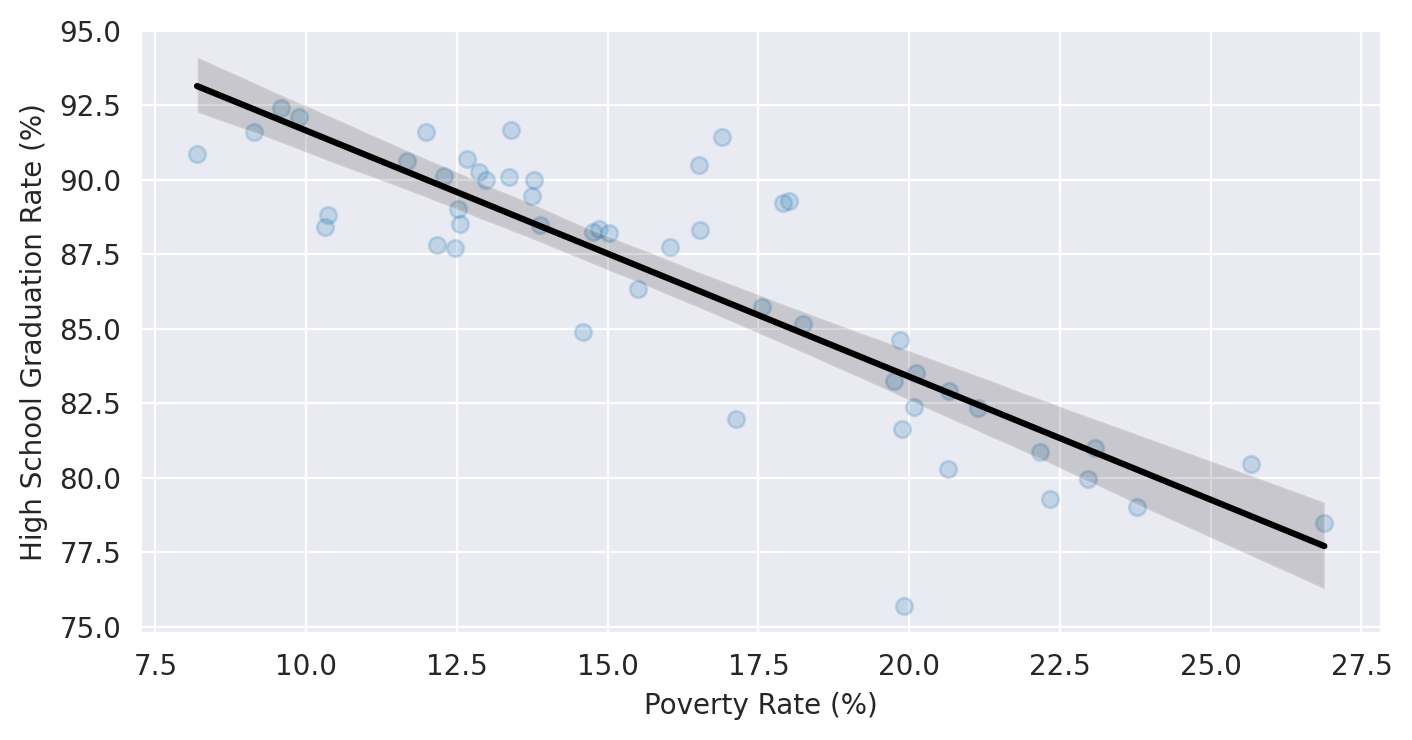

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  regplot = sns.regplot(data=merged_df_poverty_hs_grad,
              x='poverty_rate',
              y='percent_completed_hs',
              scatter_kws = {'alpha': 0.2},
              line_kws = {'color': 'black'})
  regplot.set(xlabel='Poverty Rate (%)',
              ylabel='High School Graduation Rate (%)')

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [ ]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [ ]:
# convert race percentages into numeric values
df_share_race_city.share_white = pd.to_numeric(df_share_race_city.share_white)
df_share_race_city.share_black = pd.to_numeric(df_share_race_city.share_black)
df_share_race_city.share_native_american = pd.to_numeric(df_share_race_city.share_native_american)
df_share_race_city.share_asian = pd.to_numeric(df_share_race_city.share_asian)
df_share_race_city.share_hispanic = pd.to_numeric(df_share_race_city.share_hispanic)

In [ ]:
race_by_state_sums = df_share_race_city.groupby('Geographic area').sum()
race_by_state_sums['total'] = race_by_state_sums.sum(axis=1)
race_by_state_sums

,share_white,share_black,share_native_american,share_asian,share_hispanic,total
Geographic area,,,,,,
AK,"16,068.80",199.70,"16,144.40",488.70,756.50,"33,658.10"
AL,"41,909.20","13,480.30",381.10,277.30,"1,722.50","57,770.40"
AR,"42,441.20","8,816.60",411.10,258.10,"2,311.70","54,238.70"
AZ,"27,028.00",430.50,"12,894.00",327.70,"9,085.20","49,765.40"
CA,"108,949.30","4,081.10","2,612.20","8,441.40","44,949.20","169,033.20"
CO,"40,197.90",420.30,744.20,528.90,"8,197.60","50,088.90"
CT,"12,313.10",713.90,93.90,427.50,"1,140.50","14,688.90"
DC,38.50,50.70,0.30,3.50,9.10,102.10
DE,"5,794.70","1,169.90",39.80,152.00,563.70,"7,720.10"


In [ ]:
race_by_state_pct = race_by_state_sums
race_by_state_pct.share_white = race_by_state_sums.share_white / race_by_state_sums.total
race_by_state_pct.share_black = race_by_state_sums.share_black / race_by_state_sums.total
race_by_state_pct.share_native_american = race_by_state_sums.share_native_american / race_by_state_sums.total
race_by_state_pct.share_asian = race_by_state_sums.share_asian / race_by_state_sums.total
race_by_state_pct.share_hispanic = race_by_state_sums.share_hispanic / race_by_state_sums.total

race_by_state_pct

,share_white,share_black,share_native_american,share_asian,share_hispanic,total
Geographic area,,,,,,
AK,0.48,0.01,0.48,0.01,0.02,"33,658.10"
AL,0.73,0.23,0.01,0.00,0.03,"57,770.40"
AR,0.78,0.16,0.01,0.00,0.04,"54,238.70"
AZ,0.54,0.01,0.26,0.01,0.18,"49,765.40"
CA,0.64,0.02,0.02,0.05,0.27,"169,033.20"
CO,0.80,0.01,0.01,0.01,0.16,"50,088.90"
CT,0.84,0.05,0.01,0.03,0.08,"14,688.90"
DC,0.38,0.50,0.00,0.03,0.09,102.10
DE,0.75,0.15,0.01,0.02,0.07,"7,720.10"


In [ ]:
bar = px.bar(race_by_state_pct,
             x=race_by_state_pct.index,
             y=[race_by_state_pct.share_white, race_by_state_pct.share_black, race_by_state_pct.share_native_american,
                race_by_state_pct.share_asian, race_by_state_pct.share_hispanic],
             title="Racial Makeup by US State")
bar.update_layout(xaxis_title='State',
                  yaxis_title='Racial Makeup (%)',
                  coloraxis_showscale=False)
bar.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
fatalities_race_breakdown = df_fatalities.race.value_counts()

In [ ]:
donut = px.pie(labels=fatalities_race_breakdown.index, 
               values=fatalities_race_breakdown.values,
               names=fatalities_race_breakdown.index,
               hole=0.4,
               title="Deaths by Police Broken Down by Race")
donut.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
donut.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [ ]:
fatalities_gender_breakdown = df_fatalities.gender.value_counts()
fatalities_gender_breakdown.index

Index(['M', 'F'], dtype='object')

In [ ]:
bar_fatalities_gender = px.bar(df_fatalities, 
                               x=fatalities_gender_breakdown.index, 
                               y=fatalities_gender_breakdown.values,
                               color=fatalities_gender_breakdown.values,
                               color_continuous_scale='Aggrnyl',
                               title='Deaths by Police Broken Down by Gender')
bar_fatalities_gender.update_layout(xaxis_title='Gender',
                  coloraxis_showscale=False,
                  yaxis_title='Number of Deaths')
bar_fatalities_gender.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [ ]:
df_fatalities.groupby(['manner_of_death', 'gender']).count()

id  name  date  armed   age  race  city  state  \
manner_of_death  gender                                                     
shot             F        102   102   102    102   102   102   102    102   
                 M       2261  2261  2261   2261  2261  2261  2261   2261   
shot and Tasered F          5     5     5      5     5     5     5      5   
                 M        167   167   167    167   167   167   167    167   

                         signs_of_mental_illness  threat_level  flee  \
manner_of_death  gender                                                
shot             F                           102           102   102   
                 M                          2261          2261  2261   
shot and Tasered F                             5             5     5   
                 M                           167           167   167   

                         body_camera  
manner_of_death  gender               
shot             F               102  
                 M              2261  
shot and Tasered F                 5  
                 M               167

In [ ]:
box = px.box(df_fatalities, x='manner_of_death', 
             y='age',
             color='gender', 
             points='all',
             title='Deaths by Police by Age and Manner of Death'
)
box.update_layout(xaxis_title='Manner of Death',
                  yaxis_title='Age')
box.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [ ]:
# Filter for fatalities where armed is NOT "undetermined"
df_fatalities_known_if_armed = df_fatalities[df_fatalities.armed != "undetermined"]

In [ ]:
df_fatalities_armed = df_fatalities_known_if_armed[df_fatalities.armed != "unarmed"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
print(f"Percentage of police killings where the victim was armed:  {'{:,.2f}'.format(df_fatalities_armed.id.count() / df_fatalities_known_if_armed.id.count())}")

Percentage of police killings where the victim was armed:  0.93


In [ ]:
df_fatalities_weapons = df_fatalities.groupby('armed',
                                              as_index=False).agg({'id': pd.Series.count})
df_fatalities_weapons

,armed,id
0,Taser,9
1,air conditioner,1
2,ax,9
3,baseball bat,8
4,baseball bat and bottle,1
...,...,...
63,toy weapon,104
64,unarmed,171
65,undetermined,126
66,unknown weapon,18


In [ ]:
bar_weapons = px.bar(x=df_fatalities_weapons.id,
                     y=df_fatalities_weapons.armed,
                     log_x=True,
                     title='Police Deaths - Weapon Carried by the Victim',
                     hover_name = df_fatalities_weapons.armed,
                     color=df_fatalities_weapons.id, 
                     color_continuous_scale='OrRd')
bar_weapons.update_layout(xaxis_title='Number of Fatalities (Logarithmic)', 
                          yaxis_title='Weapon?',
                          coloraxis_showscale=False,
                          autosize=False,
                          width=1200,
                          height=1500)
bar_weapons.show()

In [ ]:
df_fatalities_weapons.set_index('armed', inplace=True)
unarmed = df_fatalities_weapons.filter(items=["unarmed"], axis=0)
unarmed

,id
armed,
unarmed,171


In [ ]:
series_guns = df_fatalities_weapons.filter(like="gun", axis=0).sum().id
series_guns

1411

In [ ]:
armed_with_gun = pd.DataFrame({'id': series_guns}, index=["armed with gun"])
armed_with_gun

,id
armed with gun,1411


In [ ]:
unarmed_vs_armed_with_gun = pd.concat([unarmed, armed_with_gun])
unarmed_vs_armed_with_gun.value_counts()

id  
171     1
1411    1
dtype: int64

In [ ]:
unarmed_vs_armed_with_gun

,id
unarmed,171
armed with gun,1411


In [ ]:
bar_unarmed_vs_gun = px.bar(unarmed_vs_armed_with_gun,
                            title='Deaths by Police Armed with Gun vs Unarmed')
bar_unarmed_vs_gun.update_layout(xaxis_title='Armed with Gun vs Unarmed',
                                 yaxis_title='Number of Deaths',
                                 showlegend=False)
bar_unarmed_vs_gun.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [ ]:
# Get fatalities where age of victim is known
df_fatalities_age_known = df_fatalities[df_fatalities.age != "unknown"]
df_fatalities_age_known_total = df_fatalities_age_known.id.count()
df_fatalities_age_known_total

2458

In [ ]:
# Convert age to number
df_fatalities_age_known.age = pd.to_numeric(df_fatalities_age_known.age)
df_fatalities_age_known.age.describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



count   2,458.00
mean       36.61
std        13.03
min         6.00
25%        26.00
50%        34.00
75%        45.00
max        91.00
Name: age, dtype: float64

In [ ]:
df_fatalities_under_25 = df_fatalities_age_known[df_fatalities_age_known.age < 25]
df_fatalities_under_25

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
5,11,Kenneth Joe Brown,04/01/15,shot,gun,18.00,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,05/01/15,shot,gun,22.00,M,H,Chandler,AZ,False,attack,Car,False
22,43,Brian Barbosa,11/01/15,shot,gun,23.00,M,H,South Gate,CA,False,attack,Not fleeing,False
26,49,Marcus Golden,14/01/15,shot,vehicle,24.00,M,B,St. Paul,MN,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,2789,TK TK,19/07/17,shot,gun,24.00,M,unknown,Fair Oaks,CA,False,attack,Not fleeing,False
2505,2790,Anthony Benavidez,19/07/17,shot,knife,24.00,M,unknown,Santa Fe,NM,False,other,Not fleeing,False
2509,2794,Yahir Breito,21/07/17,shot,knife,22.00,M,unknown,Santa Ana,CA,False,other,Not fleeing,False
2516,2801,Alexander J. Schoessel,25/07/17,shot,ax,23.00,M,W,Richmond,VA,True,other,Foot,False


In [ ]:
print(f"Percentage of police killings where the victim was under age 25:  {'{:,.2f}'.format(df_fatalities_under_25.id.count() / df_fatalities_age_known.id.count())}")

Percentage of police killings where the victim was under age 25:  0.18


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

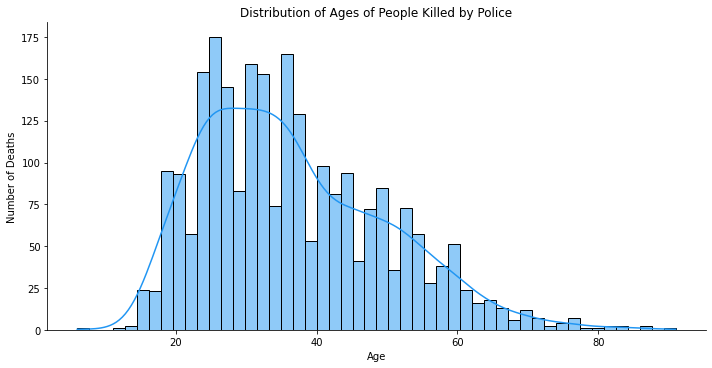

In [ ]:
sns.displot(df_fatalities_age_known.age, 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title("Distribution of Ages of People Killed by Police")
plt.xlabel('Age')
plt.ylabel('Number of Deaths')

plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

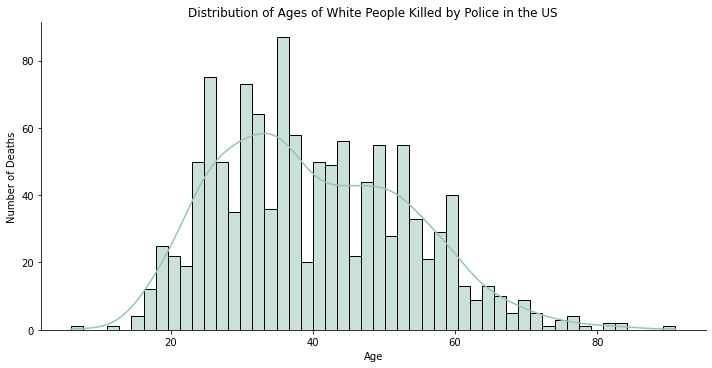

In [ ]:
sns.displot(df_fatalities_age_known[df_fatalities_age_known.race == "W"].age, 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#97C4B8')

plt.title("Distribution of Ages of White People Killed by Police in the US")
plt.xlabel('Age')
plt.ylabel('Number of Deaths')

plt.show()

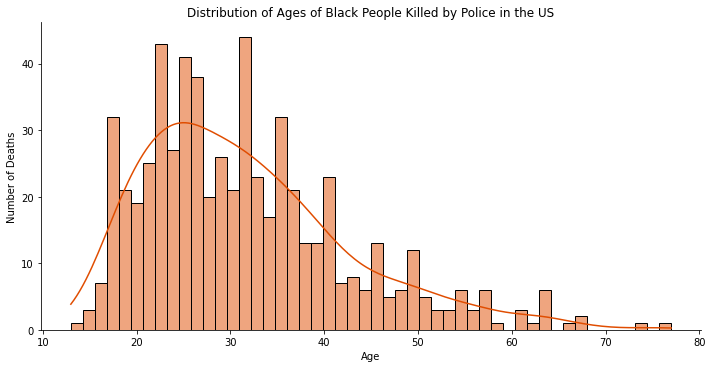

In [ ]:
sns.displot(df_fatalities_age_known[df_fatalities_age_known.race == "B"].age, 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#E04D01')

plt.title("Distribution of Ages of Black People Killed by Police in the US")
plt.xlabel('Age')
plt.ylabel('Number of Deaths')

plt.show()

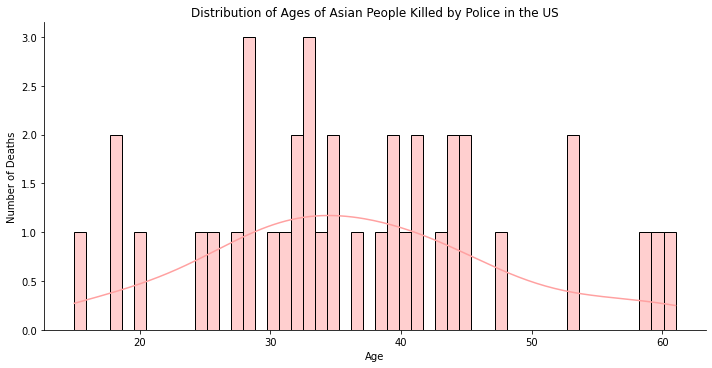

In [ ]:
sns.displot(df_fatalities_age_known[df_fatalities_age_known.race == "A"].age, 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#FFA1A1')

plt.title("Distribution of Ages of Asian People Killed by Police in the US")
plt.xlabel('Age')
plt.ylabel('Number of Deaths')

plt.show()

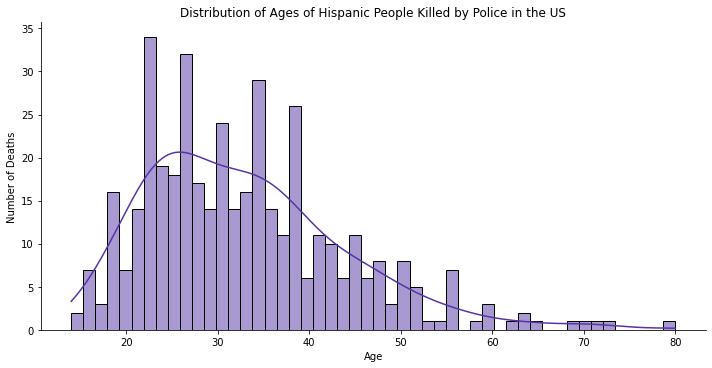

In [ ]:
sns.displot(df_fatalities_age_known[df_fatalities_age_known.race == "H"].age, 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#5534A5')

plt.title("Distribution of Ages of Hispanic People Killed by Police in the US")
plt.xlabel('Age')
plt.ylabel('Number of Deaths')

plt.show()

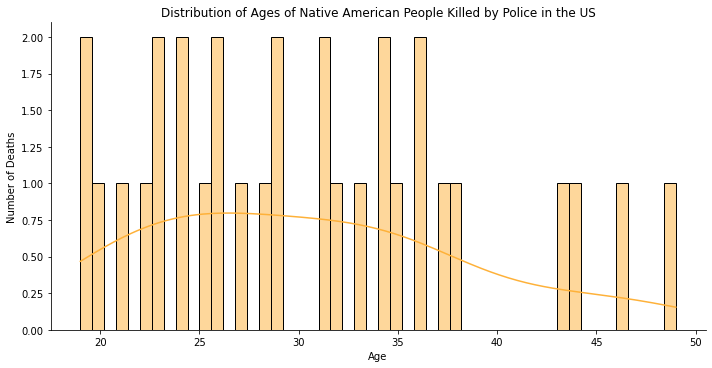

In [ ]:
sns.displot(df_fatalities_age_known[df_fatalities_age_known.race == "N"].age, 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#FEB139')

plt.title("Distribution of Ages of Native American People Killed by Police in the US")
plt.xlabel('Age')
plt.ylabel('Number of Deaths')

plt.show()

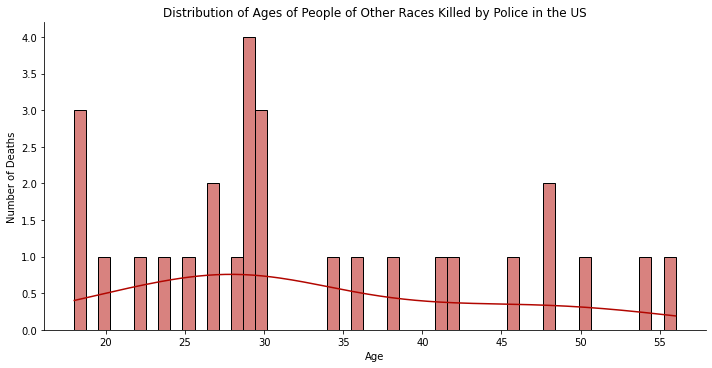

In [ ]:
sns.displot(df_fatalities_age_known[df_fatalities_age_known.race == "O"].age, 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#B20600')

plt.title("Distribution of Ages of People of Other Races Killed by Police in the US")
plt.xlabel('Age')
plt.ylabel('Number of Deaths')

plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [ ]:
df_fatalities_by_race = df_fatalities.groupby('race',
                                              as_index=False).agg({'id': pd.Series.count})
df_fatalities_by_race = df_fatalities_by_race.sort_values('id')

In [ ]:
bar_race_breakdown = px.bar(x=df_fatalities_by_race.race,
                            y=df_fatalities_by_race.id,
                            title='People Killed by Police by Race',
                            hover_name = df_fatalities_by_race.race,
                            color=df_fatalities_by_race.id, 
                            color_continuous_scale='OrRd')
bar_race_breakdown.update_layout(xaxis_title='Race', 
                                 yaxis_title='Number of Fatalities',
                                 coloraxis_showscale=False)
bar_race_breakdown.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
mental_illness_present = df_fatalities[df_fatalities.signs_of_mental_illness == True].id.count()
df_fatalities_by_mental_illness_total = df_fatalities_by_mental_illness.id.sum()
mental_illness_present

633

In [ ]:
df_fatalities_total = df_fatalities.id.count()
print(f"Percentage of police killed by police who had signs of mental illness:  {'{:,.2f}'.format(mental_illness_present / df_fatalities_by_mental_illness_total)}")

Percentage of police killed by police who had signs of mental illness:  0.25


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [ ]:
# get top 10 cities with the most police killings
df_fatalities_by_city = df_fatalities.groupby('city',
                                              as_index=False).agg({'id': pd.Series.count})
df_fatalities_by_city_10 = df_fatalities_by_city.sort_values('id', ascending=False).head(10)                                 

In [ ]:
bar_cities = px.bar(x=df_fatalities_by_city_10.id,
                     y=df_fatalities_by_city_10.city,
                     title='Top 10 Cities Where Police Killings Take Place',
                     hover_name = df_fatalities_by_city_10.city,
                     color=df_fatalities_by_city_10.id, 
                     color_continuous_scale='reds')
bar_cities.update_layout(xaxis_title='Number of Fatalities', 
                         yaxis_title='City',
                         coloraxis_showscale=False,
                         yaxis=dict(autorange="reversed"))
bar_cities.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [ ]:
for c in df_fatalities_by_city_10.city:
  print(c)

Los Angeles
Phoenix
Houston
Chicago
Las Vegas
San Antonio
Columbus
Miami
Austin
St. Louis


In [ ]:
df_fatalities_by_city_race = df_fatalities.groupby(['city', 'race'],
                                                   as_index=False).agg({'id': pd.Series.count})
df_fatalities_by_city_race_10 = df_fatalities_by_city_race[df_fatalities_by_city_race.city.isin(df_fatalities_by_city_10.city)] 
df_fatalities_by_city_race_10.shape

(42, 3)

In [ ]:
df_fatalities_by_city_race_10

,city,race,id
82,Austin,B,3
83,Austin,H,2
84,Austin,W,13
294,Chicago,B,21
295,Chicago,H,1
296,Chicago,W,2
297,Chicago,unknown,1
353,Columbus,B,11
354,Columbus,O,1
355,Columbus,W,6


In [ ]:
# make dataframe with share by race data for top 10 cities only
la = df_share_race_city[df_share_race_city.City == "Los Angeles city"]
st_louis = df_share_race_city[df_share_race_city.City == "St. Louis city"][df_share_race_city["Geographic area"] == "MO"]
san_antonio = df_share_race_city[df_share_race_city.City == "San Antonio city"][df_share_race_city["Geographic area"] == "TX"]
phoenix = df_share_race_city[df_share_race_city.City == "Phoenix city"][df_share_race_city["Geographic area"] == "AZ"]
miami = df_share_race_city[df_share_race_city.City == "Miami city"][df_share_race_city["Geographic area"] == "FL"]
lv = df_share_race_city[df_share_race_city.City == "Las Vegas city"][df_share_race_city["Geographic area"] == "NV"]
houston = df_share_race_city[df_share_race_city.City == "Houston city"][df_share_race_city["Geographic area"] == "TX"]
columbus = df_share_race_city[df_share_race_city.City == "Columbus city"][df_share_race_city["Geographic area"] == "OH"]
chicago = df_share_race_city[df_share_race_city.City == "Chicago city"]
austin = df_share_race_city[df_share_race_city.City == "Austin city"][df_share_race_city["Geographic area"] == "TX"]

top_10_cities = pd.concat([la, st_louis, san_antonio, phoenix,
                           miami, lv, houston, columbus, chicago, austin])
top_10_cities

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/l

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
2714,CA,Los Angeles city,49.80,9.60,0.70,11.30,48.50
14472,MO,St. Louis city,43.90,49.20,0.30,2.90,3.50
25872,TX,San Antonio city,72.60,6.90,0.90,2.40,63.20
1201,AZ,Phoenix city,65.90,6.50,2.20,3.20,40.80
4633,FL,Miami city,72.60,19.20,0.30,1.00,70.00
15666,NV,Las Vegas city,62.10,11.10,0.70,6.10,31.50
25157,TX,Houston city,50.50,23.70,0.70,6.00,43.80
19379,OH,Columbus city,61.50,28.00,0.30,4.10,5.60
6278,IL,Chicago city,45.00,32.90,0.50,5.50,28.90
24543,TX,Austin city,68.30,8.10,0.90,6.30,35.10


In [ ]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.20,30.20,0.00,0.00,1.60
1,AL,Abbeville city,54.40,41.40,0.10,1.00,3.10
2,AL,Adamsville city,52.30,44.90,0.50,0.30,2.30
3,AL,Addison town,99.10,0.10,0.00,0.10,0.40
4,AL,Akron town,13.20,86.50,0.00,0.00,0.30


In [ ]:
# Get sum of the percentages by city so the percentages can be recalculated so that the total adds up to 100. 
# Not exactly mathmatically sound, but I could not think of a better way to do it given the data we have here.
race_by_city_sums = top_10_cities.groupby('City').sum()
race_by_city_sums['total'] = race_by_city_sums.sum(axis=1)
race_by_city_sums

,share_white,share_black,share_native_american,share_asian,share_hispanic,total
City,,,,,,
Austin city,68.30,8.10,0.90,6.30,35.10,118.70
Chicago city,45.00,32.90,0.50,5.50,28.90,112.80
Columbus city,61.50,28.00,0.30,4.10,5.60,99.50
Houston city,50.50,23.70,0.70,6.00,43.80,124.70
Las Vegas city,62.10,11.10,0.70,6.10,31.50,111.50
Los Angeles city,49.80,9.60,0.70,11.30,48.50,119.90
Miami city,72.60,19.20,0.30,1.00,70.00,163.10
Phoenix city,65.90,6.50,2.20,3.20,40.80,118.60
San Antonio city,72.60,6.90,0.90,2.40,63.20,146.00


In [ ]:
# Get % of each race per city
race_by_city_pct = race_by_city_sums
race_by_city_pct.share_white = race_by_city_sums.share_white / race_by_city_sums.total
race_by_city_pct.share_black = race_by_city_sums.share_black / race_by_city_sums.total
race_by_city_pct.share_native_american = race_by_city_sums.share_native_american / race_by_city_sums.total
race_by_city_pct.share_asian = race_by_city_sums.share_asian / race_by_city_sums.total
race_by_city_pct.share_hispanic = race_by_city_sums.share_hispanic / race_by_city_sums.total

race_by_city_pct

,share_white,share_black,share_native_american,share_asian,share_hispanic,total
City,,,,,,
Austin city,0.58,0.07,0.01,0.05,0.30,118.70
Chicago city,0.40,0.29,0.00,0.05,0.26,112.80
Columbus city,0.62,0.28,0.00,0.04,0.06,99.50
Houston city,0.40,0.19,0.01,0.05,0.35,124.70
Las Vegas city,0.56,0.10,0.01,0.05,0.28,111.50
Los Angeles city,0.42,0.08,0.01,0.09,0.40,119.90
Miami city,0.45,0.12,0.00,0.01,0.43,163.10
Phoenix city,0.56,0.05,0.02,0.03,0.34,118.60
San Antonio city,0.50,0.05,0.01,0.02,0.43,146.00


In [ ]:
# Plot a histogram of race breakdown of police killings in the 10 cities
hist_cities_by_race = px.histogram(x=df_fatalities_by_city_race_10.id,
                                   y=df_fatalities_by_city_race_10.city,
                                   title='Top 10 Cities Where Police Killings Take Place, Broken Down by Race',
                                   hover_name = df_fatalities_by_city_race_10.race,
                                   color=df_fatalities_by_city_race_10.race,
                                   barnorm='percent')
hist_cities_by_race.update_layout(xaxis_title='Number of Fatalities', 
                         yaxis_title='City')
hist_cities_by_race.show()

In [ ]:
# Contrast with population race breakdown in the same cities
bar2 = px.bar(race_by_city_pct,
              x=[race_by_city_pct.share_white, race_by_city_pct.share_black, race_by_city_pct.share_native_american,
                race_by_city_pct.share_asian, race_by_city_pct.share_hispanic],
              y=race_by_city_pct.index,    
             title="Racial Makeup of US Cities that are the Top 10 Where Police Killings Take Place")
bar2.update_layout(xaxis_title='Racial Makeup (%)',
                   yaxis_title='City (Top 10 for Police Killings)',
                   coloraxis_showscale=False)
bar2.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [ ]:
fatalities_by_state = df_fatalities.groupby(['state'], as_index=False).agg({'id': pd.Series.count})

state_map = px.choropleth(fatalities_by_state,
                          locationmode="USA-states",
                          locations="state",
                          color="id",
                          hover_name="state",
                          color_continuous_scale=px.colors.sequential.matter,
                          title="Number of Police Killings by US State",
                          scope="usa")
state_map.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [ ]:
# convert to date type
df_fatalities["date"] = pd.to_datetime(df_fatalities["date"])
df_fatalities_monthly = df_fatalities.resample('M', on='date').count()
df_fatalities_monthly

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
date,,,,,,,,,,,,,,
2015-01-31,70,70,70,70,70,70,70,70,70,70,70,70,70,70
2015-02-28,78,78,78,78,78,78,78,78,78,78,78,78,78,78
2015-03-31,87,87,87,87,87,87,87,87,87,87,87,87,87,87
2015-04-30,88,88,88,88,88,88,88,88,88,88,88,88,88,88
2015-05-31,85,85,85,85,85,85,85,85,85,85,85,85,85,85
2015-06-30,68,68,68,68,68,68,68,68,68,68,68,68,68,68
2015-07-31,85,85,85,85,85,85,85,85,85,85,85,85,85,85
2015-08-31,86,86,86,86,86,86,86,86,86,86,86,86,86,86
2015-09-30,90,90,90,90,90,90,90,90,90,90,90,90,90,90


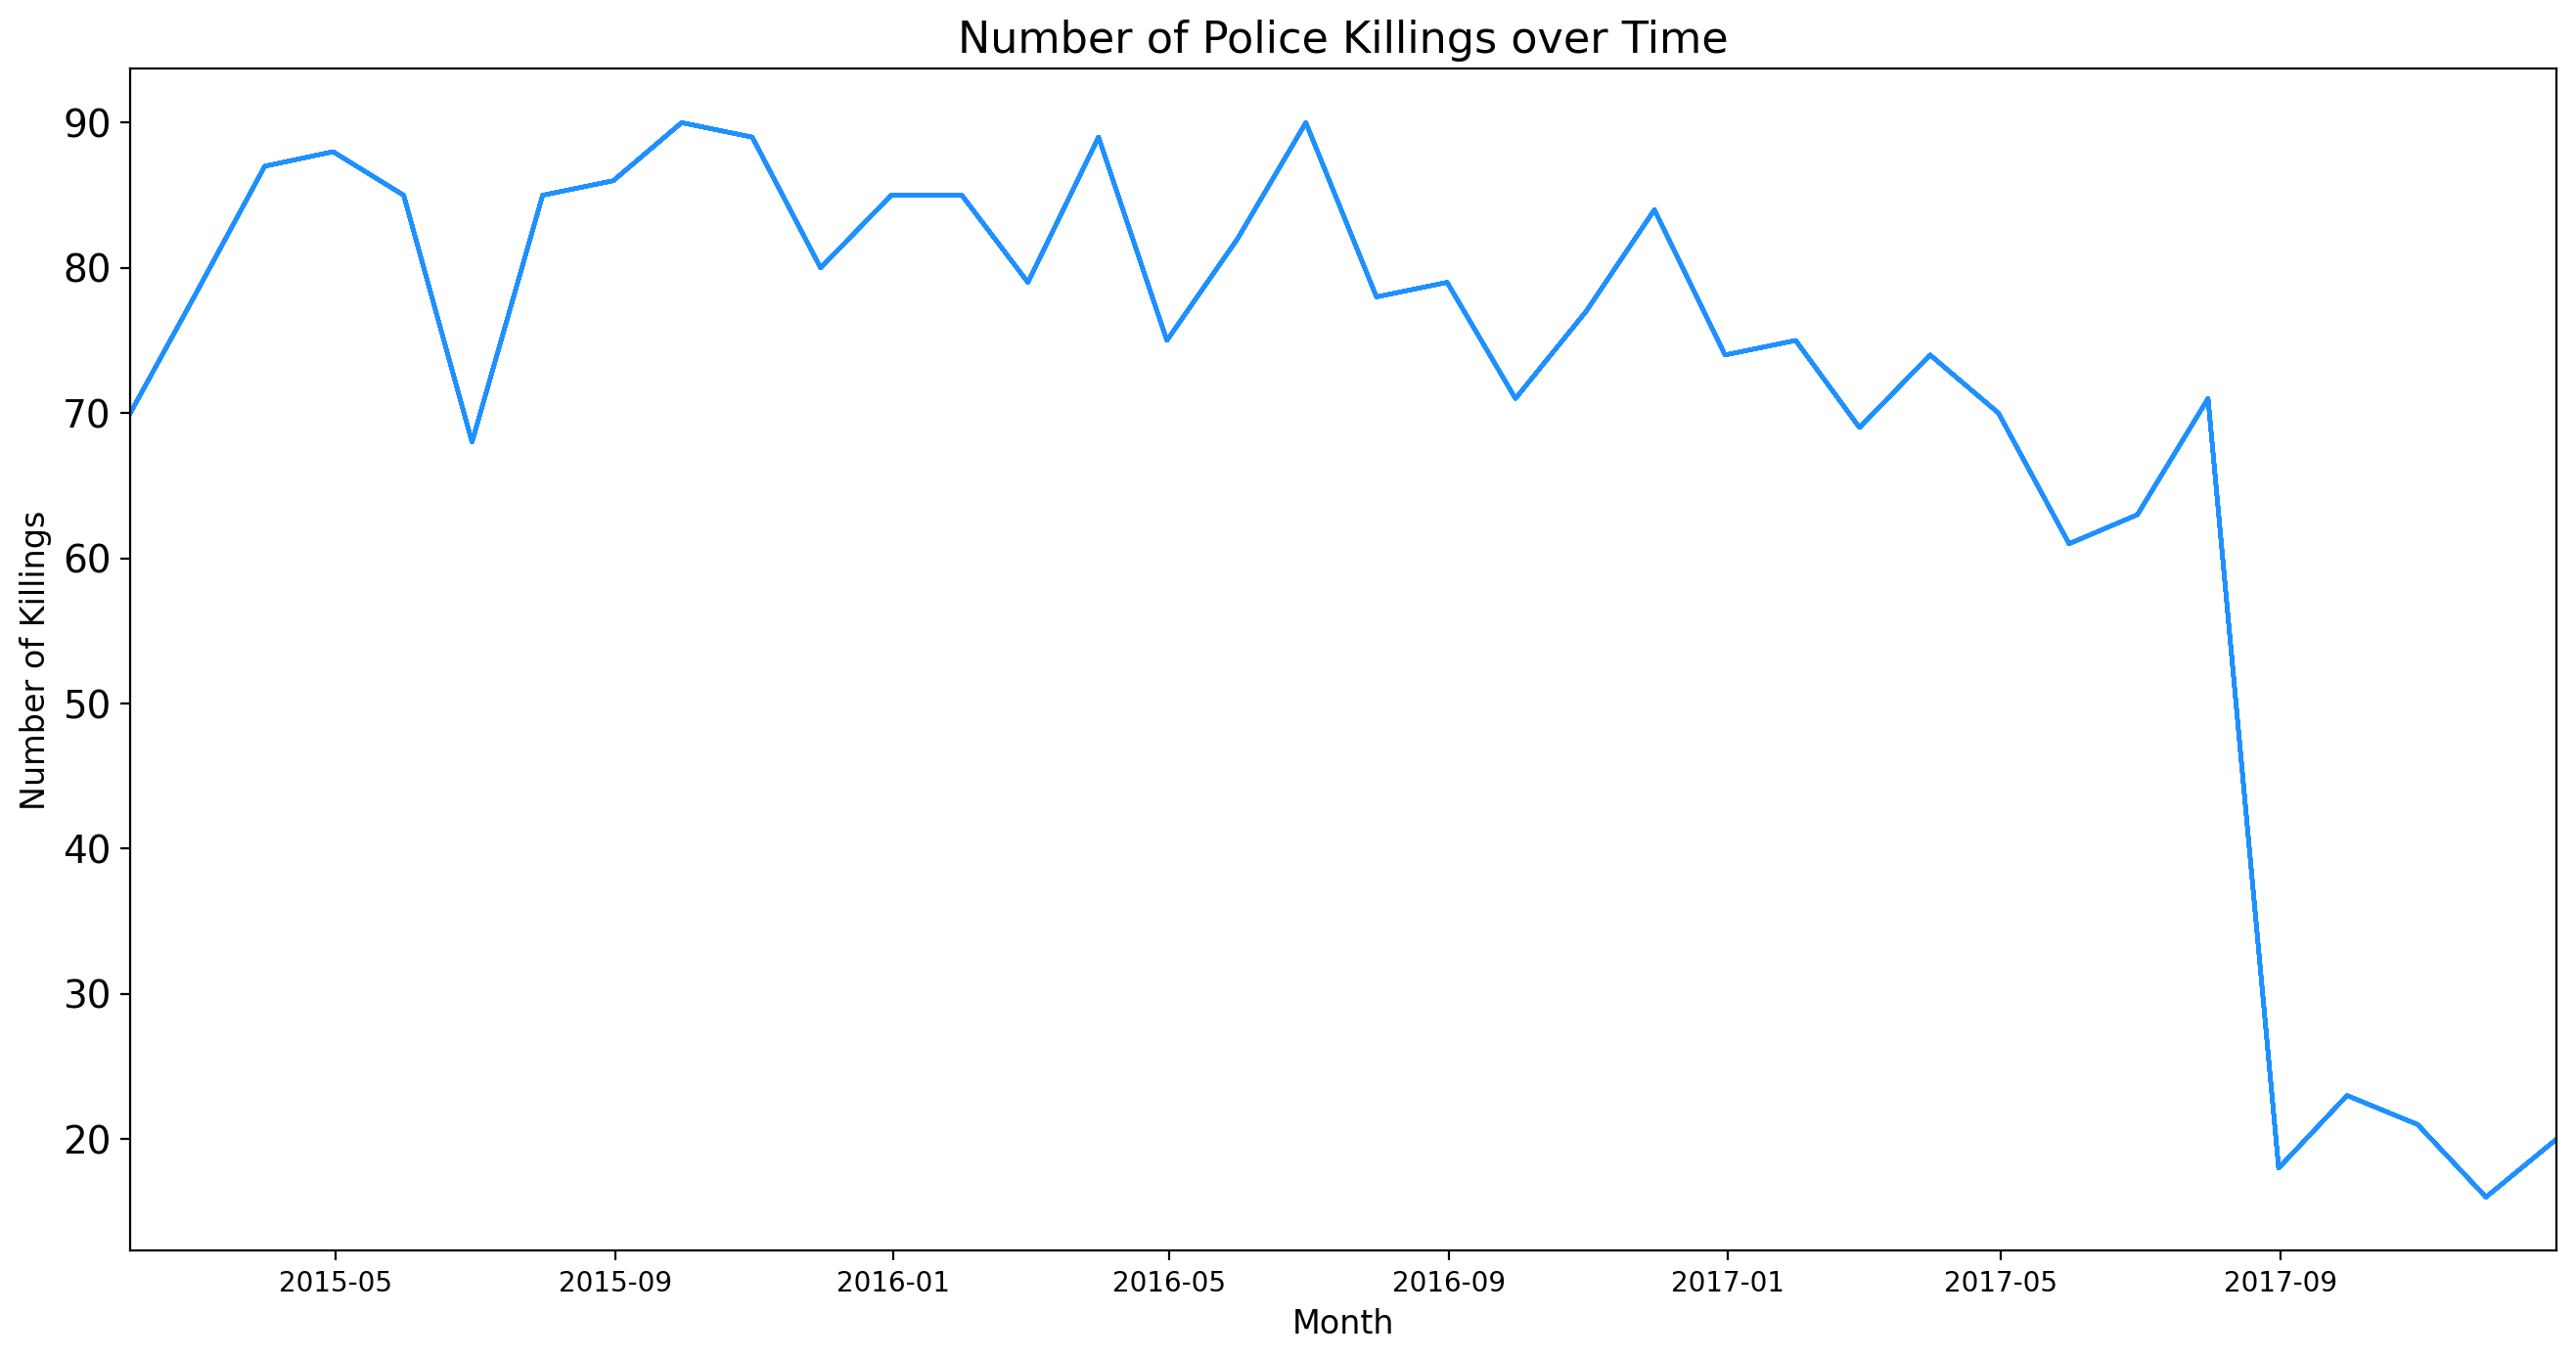

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title("Number of Police Killings over Time", fontsize=16)
plt.yticks(fontsize=14)

ax = plt.gca()
ax.set_xlim(df_fatalities_monthly.index.min(), df_fatalities_monthly.index.max())

ax.plot(df_fatalities_monthly.index,
        df_fatalities_monthly.values,
        c='dodgerblue')

ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Number of Killings', fontsize=12)

plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).